In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5[perfomances_dt5['policy_name'] == 'fee']


,policy,NMS,Y_corn,L,leach_ext,N_fert,P,G,policy_val,policy_name,L_change,Y_corn_change,S,GC,P_dlt,Y_corn_pct,C
20,fee_0,1,11210.773826,53.078496,86.792124,182.152621,1442.001501,0.000000,0.0,fee,0.0,1.000000,0.000000,0.00,0.000000,1.000000,-0.000000
21,fee_1,1,11174.105192,51.491366,83.994153,175.098078,1390.314706,51.491366,1.0,fee,-3.0,0.996729,-51.686794,-0.20,-51.686794,0.996729,0.195429
22,fee_2,1,11160.393763,50.693611,82.746020,172.152621,1340.561071,101.387221,2.0,fee,-4.5,0.995506,-101.440430,-0.05,-101.440430,0.995506,0.053209
23,fee_3,1,11093.364592,48.543236,78.925830,162.152621,1293.934499,145.629709,3.0,fee,-8.5,0.989527,-148.067002,-2.44,-148.067002,0.989527,2.437293
24,fee_4,1,11093.364592,48.543236,78.925830,162.152621,1245.391263,194.172945,4.0,fee,-8.5,0.989527,-196.610238,-2.44,-196.610238,0.989527,2.437293
25,fee_5,1,11004.618354,46.624123,75.385065,152.152621,1201.019118,233.120616,5.0,fee,-12.2,0.981611,-240.982382,-7.86,-240.982382,0.981611,7.861766
26,fee_6,1,11004.618354,46.624123,75.385065,152.152621,1154.394995,279.744740,6.0,fee,-12.2,0.981611,-287.606506,-7.86,-287.606506,0.981611,7.861766
27,fee_7,1,11004.618354,46.624123,75.385065,152.152621,1107.770872,326.368863,7.0,fee,-12.2,0.981611,-334.230629,-7.86,-334.230629,0.981611,7.861766
28,fee_8,1,10969.315341,46.051708,74.332329,149.207164,1062.845471,368.413661,8.0,fee,-13.2,0.978462,-379.156029,-10.74,-379.156029,0.978462,10.742368
29,fee_9,1,10889.270986,44.929823,72.145133,142.152621,1020.622695,404.368408,9.0,fee,-15.4,0.971322,-421.378806,-17.01,-421.378806,0.971322,17.010398


In [3]:
perfomances_dt5['L_change'] = -perfomances_dt5['L_change']
perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '2')]
fee_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '2')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '2')]
subs_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '2')]

perfomances_dt5[perfomances_dt5['policy_name'] == 'fee']

,policy,NMS,Y_corn,L,leach_ext,N_fert,P,G,policy_val,policy_name,L_change,Y_corn_change,S,GC,P_dlt,Y_corn_pct,C
20,fee_0,1,11210.773826,53.078496,86.792124,182.152621,1442.001501,0.000000,0.0,fee,-0.0,1.000000,0.000000,0.00,0.000000,1.000000,-0.000000
59,fee_0,2,11042.636471,48.125453,77.191537,158.997725,1434.670698,0.000000,0.0,fee,9.3,0.985002,-7.330802,-7.33,-7.330802,0.985002,7.330802
60,fee_1,2,10932.560381,45.494395,71.596676,145.518456,1383.201140,45.494395,1.0,fee,14.3,0.975183,-58.800361,-13.31,-58.800361,0.975183,13.305966
21,fee_1,1,11174.105192,51.491366,83.994153,175.098078,1390.314706,51.491366,1.0,fee,3.0,0.996729,-51.686794,-0.20,-51.686794,0.996729,0.195429
61,fee_2,2,10832.292389,44.184575,68.883291,137.473308,1331.920470,88.369149,2.0,fee,16.8,0.966239,-110.081031,-21.71,-110.081031,0.966239,21.711882
22,fee_2,1,11160.393763,50.693611,82.746020,172.152621,1340.561071,101.387221,2.0,fee,4.5,0.995506,-101.440430,-0.05,-101.440430,0.995506,0.053209
62,fee_3,2,10779.750864,43.546448,67.776951,133.244268,1285.254789,130.639344,3.0,fee,18.0,0.961553,-156.746711,-26.11,-156.746711,0.961553,26.107368
23,fee_3,1,11093.364592,48.543236,78.925830,162.152621,1293.934499,145.629709,3.0,fee,8.5,0.989527,-148.067002,-2.44,-148.067002,0.989527,2.437293
63,fee_4,2,10741.191658,43.055833,66.903075,130.145102,1240.441929,172.223332,4.0,fee,18.9,0.958113,-201.559572,-29.34,-201.559572,0.958113,29.336240
24,fee_4,1,11093.364592,48.543236,78.925830,162.152621,1245.391263,194.172945,4.0,fee,8.5,0.989527,-196.610238,-2.44,-196.610238,0.989527,2.437293


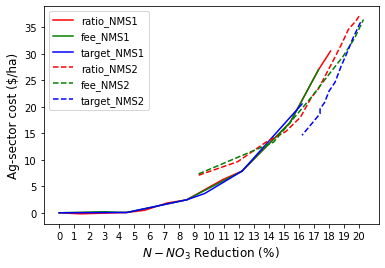

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
# ax.plot(subs_1_dt['L_change'], subs_1_dt['C'], color = 'y', label = 'subs_NMS1')
ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'target_NMS2')
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/ag_sector_cost.png"
plt.savefig(plot_file_name, dpi=300)